In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
import tensorflow as tf
from tensorflow.keras.datasets import mnist, fashion_mnist
import matplotlib.pyplot as plt

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)

y_train = x_train
y_test = x_test

x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

In [3]:
class AutoEncoder(nn.Module):

    def __init__(self):

        super().__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3)
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Tanh()
        )
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [4]:
model = AutoEncoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [30]:
num_epochs = 100
outputs = []
for epoch in range(num_epochs):
    for img in x_train[::600]:
        img = torch.FloatTensor(img).unsqueeze(0)
        recon = model(img)
        loss = criterion(recon, img.view(1, 28*28))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch: {epoch + 1}, Loss: {loss.item():.4f}")
    outputs.append((epoch, img, recon))

Epoch: 1, Loss: 0.0140
Epoch: 2, Loss: 0.0120
Epoch: 3, Loss: 0.0118
Epoch: 4, Loss: 0.0091
Epoch: 5, Loss: 0.0101
Epoch: 6, Loss: 0.0087
Epoch: 7, Loss: 0.0094
Epoch: 8, Loss: 0.0071
Epoch: 9, Loss: 0.0091
Epoch: 10, Loss: 0.0100
Epoch: 11, Loss: 0.0145
Epoch: 12, Loss: 0.0076
Epoch: 13, Loss: 0.0071
Epoch: 14, Loss: 0.0091
Epoch: 15, Loss: 0.0093
Epoch: 16, Loss: 0.0076
Epoch: 17, Loss: 0.0082
Epoch: 18, Loss: 0.0087
Epoch: 19, Loss: 0.0074
Epoch: 20, Loss: 0.0080
Epoch: 21, Loss: 0.0068
Epoch: 22, Loss: 0.0073
Epoch: 23, Loss: 0.0069
Epoch: 24, Loss: 0.0107
Epoch: 25, Loss: 0.0068
Epoch: 26, Loss: 0.0069
Epoch: 27, Loss: 0.0087
Epoch: 28, Loss: 0.0071
Epoch: 29, Loss: 0.0096
Epoch: 30, Loss: 0.0066
Epoch: 31, Loss: 0.0105
Epoch: 32, Loss: 0.0068
Epoch: 33, Loss: 0.0072
Epoch: 34, Loss: 0.0073
Epoch: 35, Loss: 0.0072
Epoch: 36, Loss: 0.0091
Epoch: 37, Loss: 0.0091
Epoch: 38, Loss: 0.0063
Epoch: 39, Loss: 0.0070
Epoch: 40, Loss: 0.0088
Epoch: 41, Loss: 0.0070
Epoch: 42, Loss: 0.0064
E

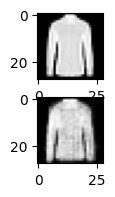

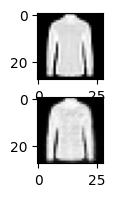

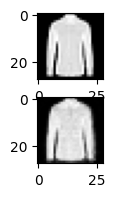

In [31]:
for k in range(0, num_epochs, 40):
    plt.figure(figsize=(9, 2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])
            
    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1) # row_length + i + 1
        item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])

    plt.show()
    plt.close()

Epoch: 1, Loss: 0.0163
Epoch: 2, Loss: 0.0161
Epoch: 3, Loss: 0.0162
Epoch: 4, Loss: 0.0161
Epoch: 5, Loss: 0.0163
Epoch: 6, Loss: 0.0163
Epoch: 7, Loss: 0.0161
Epoch: 8, Loss: 0.0161
Epoch: 9, Loss: 0.0161
Epoch: 10, Loss: 0.0159
Epoch: 11, Loss: 0.0159
Epoch: 12, Loss: 0.0160
Epoch: 13, Loss: 0.0158
Epoch: 14, Loss: 0.0159
Epoch: 15, Loss: 0.0161
Epoch: 16, Loss: 0.0164
Epoch: 17, Loss: 0.0163
Epoch: 18, Loss: 0.0164
Epoch: 19, Loss: 0.0160
Epoch: 20, Loss: 0.0158
Epoch: 21, Loss: 0.0159
Epoch: 22, Loss: 0.0161
Epoch: 23, Loss: 0.0159
Epoch: 24, Loss: 0.0160
Epoch: 25, Loss: 0.0160
Epoch: 26, Loss: 0.0162
Epoch: 27, Loss: 0.0159
Epoch: 28, Loss: 0.0159
Epoch: 29, Loss: 0.0163
Epoch: 30, Loss: 0.0159
Epoch: 31, Loss: 0.0160
Epoch: 32, Loss: 0.0159
Epoch: 33, Loss: 0.0159
Epoch: 34, Loss: 0.0160
Epoch: 35, Loss: 0.0162
Epoch: 36, Loss: 0.0162
Epoch: 37, Loss: 0.0161
Epoch: 38, Loss: 0.0159
Epoch: 39, Loss: 0.0161
Epoch: 40, Loss: 0.0160
Epoch: 41, Loss: 0.0159
Epoch: 42, Loss: 0.0163
E

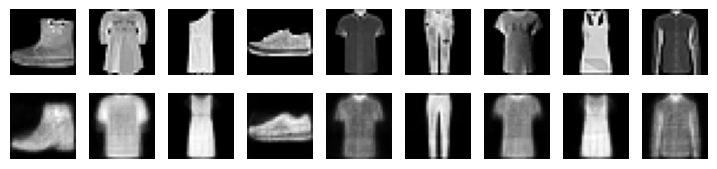

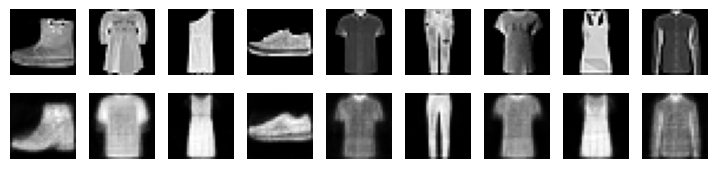

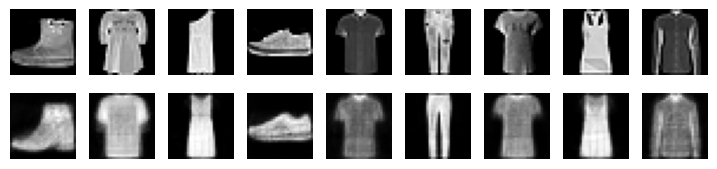

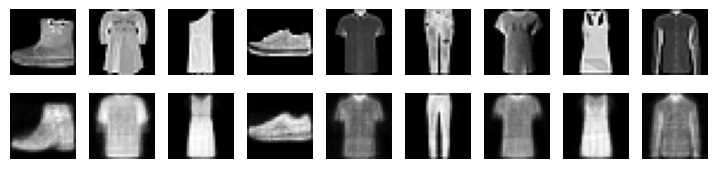

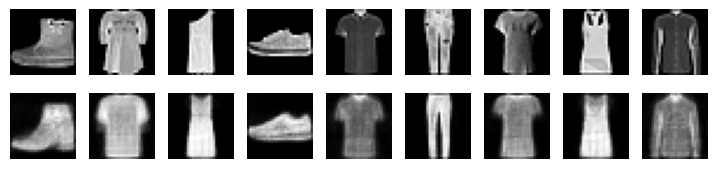

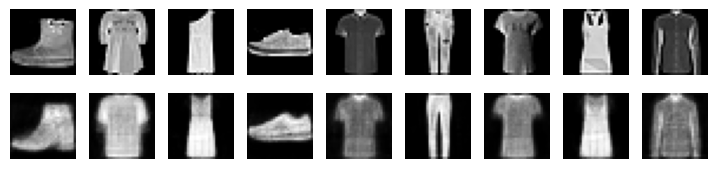

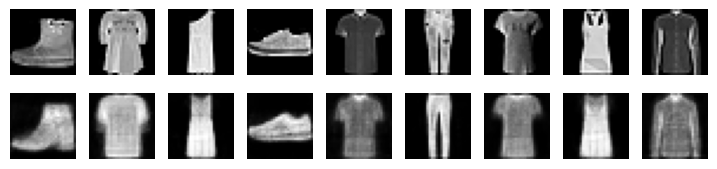

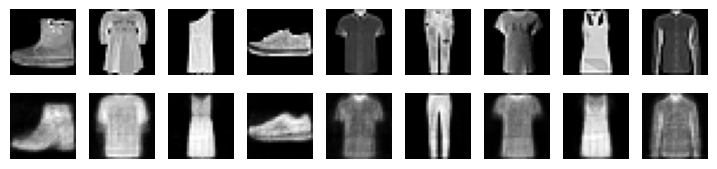

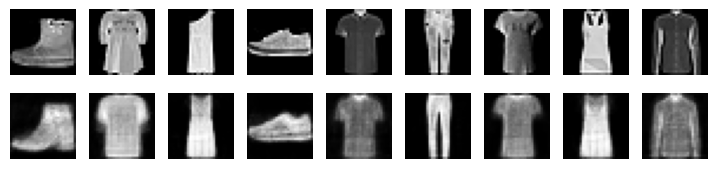

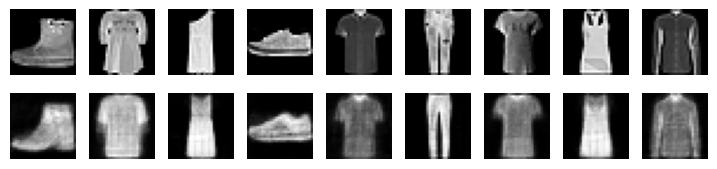

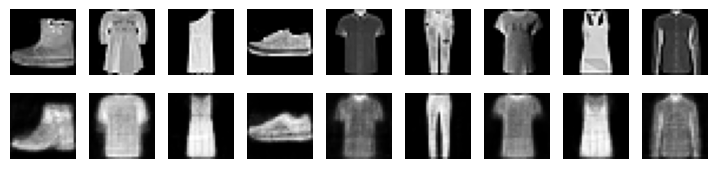

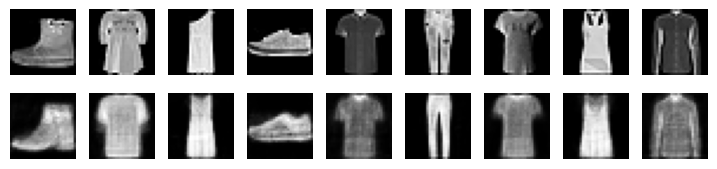

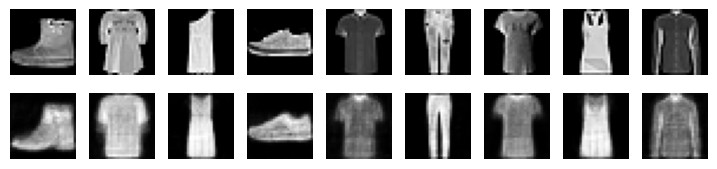

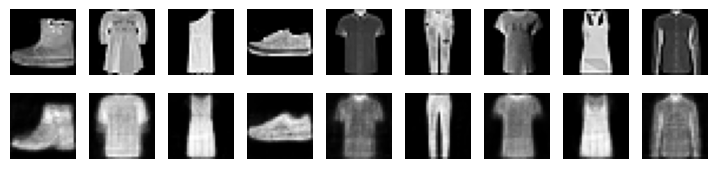

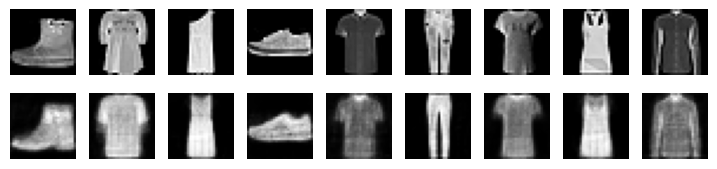

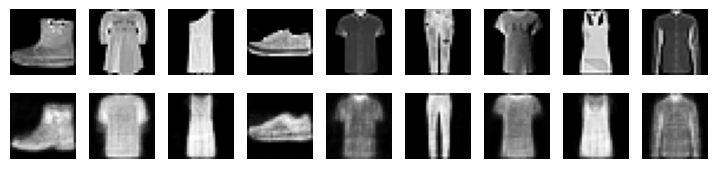

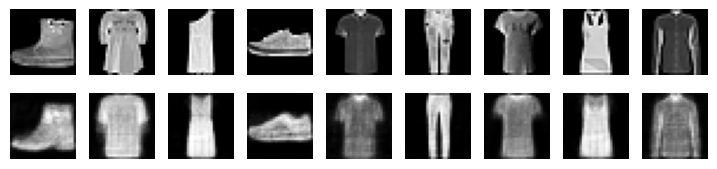

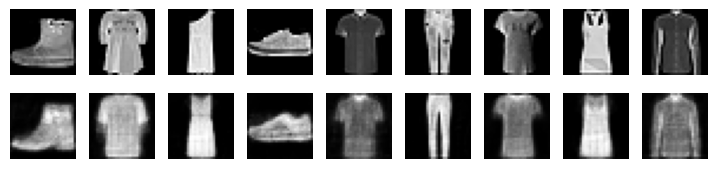

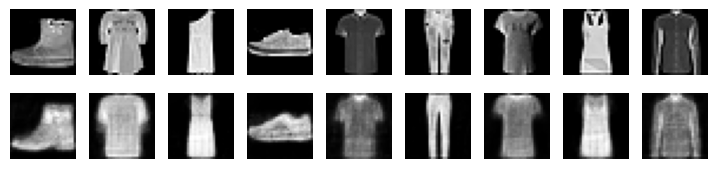

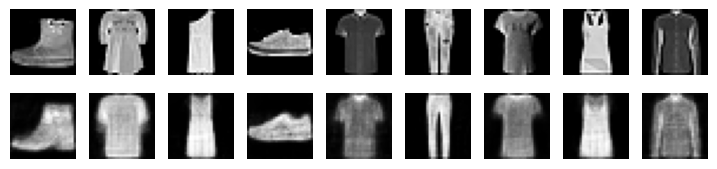

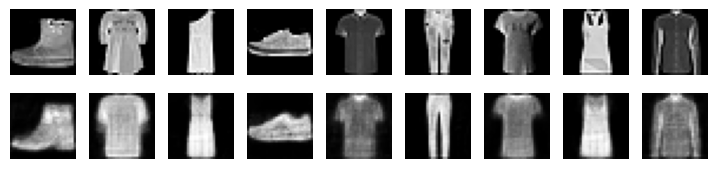

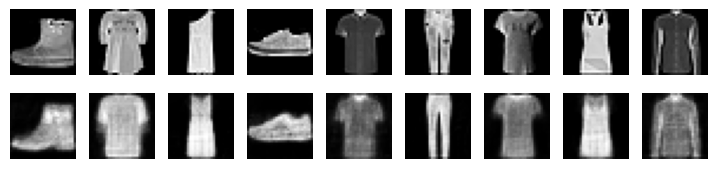

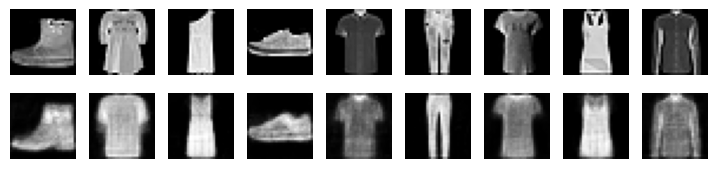

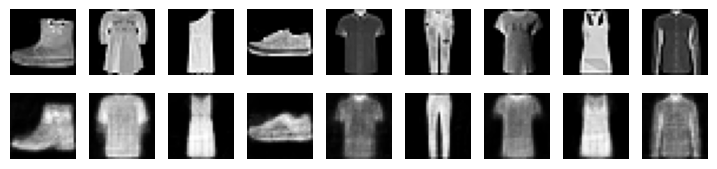

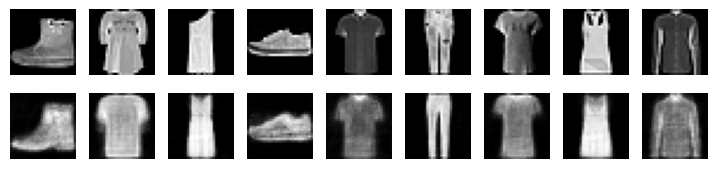

In [36]:
batch_size = 9
num_epochs = 100
outputs = []

for epoch in range(num_epochs):
    # Process in batches of size 9
    for i in range(0, x_train.shape[0]//100, batch_size):
        # Select a batch of images
        img_batch = torch.FloatTensor(x_train[i:i+batch_size])
        
        # Forward pass
        recon_batch = model(img_batch)
        loss = criterion(recon_batch, img_batch)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch: {epoch + 1}, Loss: {loss.item():.4f}")
    
    # Store the batch of images and reconstructions for visualization
    outputs.append((epoch, img_batch.detach(), recon_batch.detach()))

### Plotting
for k in range(0, num_epochs, 4):  # Show every 4th epoch
    plt.figure(figsize=(9, 2))
    plt.gray()

    # Extract original images and reconstructions from outputs
    imgs = outputs[k][1].numpy().reshape(-1, 28, 28)
    recon = outputs[k][2].numpy().reshape(-1, 28, 28)
    
    # Display original images
    for i in range(9):  # Plot up to 9 images
        plt.subplot(2, 9, i + 1)
        plt.imshow(imgs[i], cmap="gray")
        plt.axis('off')
    
    # Display reconstructed images
    for i in range(9):  # Plot up to 9 reconstructions
        plt.subplot(2, 9, 9 + i + 1)
        plt.imshow(recon[i], cmap="gray")
        plt.axis('off')

    plt.show()
    plt.close()